![banner](banner.png)

<h1 align="center">
An Introduction to Julia
</h1>
<h5 align="center">
Author: <i>Robby Boney</i>  |
Vol: 1 |
Iss: 2
</h5>
<h5 align="center">
    Other Pages: <a href="https://github.com/HarmonicHemispheres/src_box/tree/master/vol-1/issue-2/setup.md">Setup and Install</a>
</h5>
<hr>
<br>

# What is Julia?

> **Julia is a high-level, high-performance, dynamic programming language. While it is a general purpose language and can be used to write any application, many of its features are well-suited for high-performance numerical analysis and computational science.** <br> ~ https://en.wikipedia.org/wiki/Julia_(programming_language)

> **Julia in a Nutshell: Julia is Fast compiling with LLVM, dynamically & optionally typed, open source, high level syntax, general purpose** <Br> ~ https://julialang.org/

# Why Another Language...?
- [near C Speed out of the box](https://julialang.org/benchmarks/)
- Solves the two language problem
- intuitive for technical computing (math, science, data, "AI")
- opt in type system
- first class support for parallel computing
- composable with multiple dispatch for powerful code organization (particularly useful for mathematical operations)
- first class support for math functions with syntax and unicode characters


> _To read more about the original reasoning behind julia, check out the [original paper](https://arxiv.org/pdf/1209.5145.pdf) published from MIT in 2012._

# Julia's Status Today?
Over 13Million Downloads to date and growing. Looking at the top packages on `julia observer` and the research page on julia's website, it can be seen that julia is supported by major groups and has many AI and data packages at the top of the popularity charts for packages.

- https://juliaobserver.com/
- https://julialang.org/research/

# Quick Syntax Overview ([cheat sheet](https://juliadocs.github.io/Julia-Cheat-Sheet/))

In [1]:
# just some ol comments

In [2]:
# numbers and things
4 + 3 * 5

19

In [3]:
# functions are neat... and mathematical
f(x)::Int8 = 16x + 15
f(7)

127

In [4]:
# bigger functions are a thing...
function fib(n, i=0)
    if i >= n-2
        return 1
    else
        return fib(n, i+1) + fib(n, i+2)
    end
end

# loops are useful
for i = 1:45
    r = fib(i)
    print("$r ")
end

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 

### MATH CHARACTER SUPPORT.... WOT!?!?!?!
https://docs.julialang.org/en/v1/manual/unicode-input/

S1. type completion sequence... \sqrt

S2. hit tab...

In [5]:
√(5 * 1)

2.23606797749979

### Builtin Plotting

In [6]:
using Plots

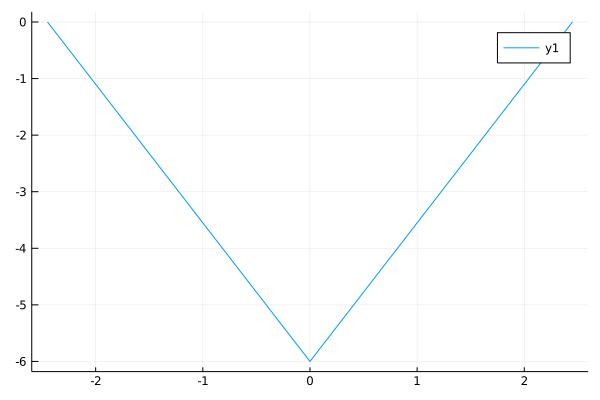

In [7]:
# quadratic equation fun-ness!
quad(a,b,c) = [(-b+√(b^2-4a*c))/(2a), 
               0,
               (-b-√(b^2-4a*c))/(2a)]
fn(x) = x^2 - 6
x = quad(1,0,-6)
y = [fn(x[1]), fn(x[2]), fn(x[3])]
plot(x, y)

### Goodbye Classes!
forget classes... Embrace Structs and Multiple Dispatch for Composable Methods.
https://docs.julialang.org/en/v1/manual/types/

In [8]:
struct Player
    name::String
    x::Float64
    y::Float64
    z::Float64
end

player = Player("Billy Bob II", 0, 3.54, 24)

Player("Billy Bob II", 0.0, 3.54, 24.0)

In [9]:
player.name

"Billy Bob II"

In [10]:
player.name = "DumbBot"

ErrorException: setfield! immutable struct of type Player cannot be changed

In [11]:
mutable struct Bot
    name::String
    x::Float64
    y::Float64
    z::Float64
end

bot = Bot("Dumb", 0, 0, 1)
bot.x += 1
bot

Bot("Dumb", 1.0, 0.0, 1.0)

### [Powerful Metaprogramming](https://docs.julialang.org/en/v1/manual/metaprogramming/)
metaprogramming is the use of language to manipulate itself or its behavior. This is typically seen through features like [operator overloading](https://docs.python.org/3/reference/datamodel.html) in Python, [macros](https://doc.rust-lang.org/book/ch19-06-macros.html) in Rust, and [proxies](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Meta_programming) in Javascript. In Julia multiple tools exist for deep customization of types and language behaviors.

In [12]:
#### SYMBOLS and Code Generation ####
program = "sqr(x,n) = x^n"
exp = Meta.parse(program)

:(sqr(x, n) = begin
          #= none:1 =#
          x ^ n
      end)

In [13]:
eval(exp)
sqr(4,5)

1024

## [Macros](https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros-1)
macros provide a way to generate expressions that get compiled directly with the script rather then needing a `eval()` statement to run at runtime. this is really powerful because it means code can be reduced without sacrificing performance. Macros return expressions, which is refered to as `quoting` and provides a way to `quote` generated code in the final script.

In the example below the `xy_across` macro takes a function and 2 ranges then applies the x and y range across the function resulting in a multidimensional array. This could be handy for writing simple functions with two inputs then simply calling `@xy_across(...)` when an array is needed that uses multiple inputs across the single function (i.e. parameterized testing)

In [14]:
#### MACROS ####
macro xy_across(func, xrng, yrng)
    return quote
        arr = Any[]
        for x = $xrng
            for y = $yrng
                res = $func(x, y)
                vec = [x, y, res]
                push!(arr, vec)
            end
        end
        return arr
    end
end

@xy_across (macro with 1 method)

In [15]:
@xy_across(sqr, 1:3, 5:10)

18-element Array{Any,1}:
 [1, 5, 1]
 [1, 6, 1]
 [1, 7, 1]
 [1, 8, 1]
 [1, 9, 1]
 [1, 10, 1]
 [2, 5, 32]
 [2, 6, 64]
 [2, 7, 128]
 [2, 8, 256]
 [2, 9, 512]
 [2, 10, 1024]
 [3, 5, 243]
 [3, 6, 729]
 [3, 7, 2187]
 [3, 8, 6561]
 [3, 9, 19683]
 [3, 10, 59049]

# A Few Cool Projects

- plots
    - http://docs.juliaplots.org/latest/generated/gr/
    - http://docs.juliaplots.org/latest/
- faster then pandas, liked by pydata 
    - https://juliadb.org/
    - https://github.com/JuliaData/JuliaDB.jl/blob/master/docs/src/tutorial.md
- databases, https://github.com/JuliaDatabases
    - https://felipenoris.github.io/Mongoc.jl/stable/tutorial/
    - https://github.com/JuliaDatabases/Redis.jl
- julia from python, https://pyjulia.readthedocs.io/en/latest/usage.html#high-level-interface
- calculus, https://docs.sciml.ai/v5.0.0/tutorials/ode_example.html#Example-2:-Solving-Systems-of-Equations-1
- flux for ai, https://fluxml.ai/
    - https://fluxml.ai/experiments/mnist/
- chemiformatics, https://github.com/svaksha/Julia.jl/blob/master/Chemistry.md
- astronomony, https://github.com/JuliaAstro/astrolib.jl
- direct GPU support with CUDA, https://juliagpu.gitlab.io/CUDA.jl/usage/overview/#UsageOverview-1
- parallelism with composable threads, https://julialang.org/blog/2019/07/multithreading/
- web frameworks... cool? (not as cool as rocket.rs), https://genieframework.com/ 
- julia + jupyter online, https://www.juliabox.com/

# Review
Julia is a great tool for working with data, scientific computing and other performance intensive opterations related to data work. The strong focus on mathematics and technical computing tasks has bolstered a community of people working in related fields which has greatly helped advance the Julia ecosystem for these areas.

# Resources
If you find this notebook incomplete or lacking, try refering to these julia resources.
- [Julia Docs](https://docs.julialang.org/en/v1/manual/getting-started/)
- [Julia Cheatsheet](https://juliadocs.github.io/Julia-Cheat-Sheet/)
- [Julia Learning Resources](https://julialang.org/learning/)